Katie Rodeghiero <br>
MGSC 410 <br>
Assignment 4

In [104]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import os

In [105]:
features = pd.read_csv("/Users/katierodeghiero/Documents/CPSC_Courses/MGSC410/Features-data-set.csv")
sales = pd.read_csv("/Users/katierodeghiero/Documents/CPSC_Courses/MGSC410/sales-data-set.csv") #walmart
stores = pd.read_csv("/Users/katierodeghiero/Documents/CPSC_Courses/MGSC410/stores-data-set-withDMA.csv")

In [106]:
stores = stores.drop(['Unnamed: 4', 'Unnamed: 5',
                     'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1)

In [107]:
merged = sales.merge(stores, how='left').merge(features, how='left')

In [108]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0   
    
split_date(merged) 

In [109]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   DMA           421570 non-null  object        
 8   Temperature   421570 non-null  float64       
 9   Fuel_Price    421570 non-null  float64       
 10  MarkDown1     150681 non-null  float64       
 11  MarkDown2     111248 non-null  float64       
 12  MarkDown3     137091 non-null  float64       
 13  MarkDown4     134967 non-null  float64       
 14  MarkDown5     151432 non-null  float64       
 15  CPI           421

In [113]:
merged = merged.rename(columns={"DMA ": "DMA"})

In [114]:
colors = [[0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], [0.9290, 0.6940, 0.1250], 
          [0.4940, 0.1840, 0.5560], [0.4660, 0.6740, 0.1880], [0.3010, 0.7450, 0.9330], 
          [0.6350, 0.0780, 0.1840],
         [0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], [0.9290, 0.6940, 0.1250], 
          [0.4940, 0.1840, 0.5560], [0.4660, 0.6740, 0.1880], [0.3010, 0.7450, 0.9330], 
          [0.6350, 0.0780, 0.1840],
         [0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], [0.9290, 0.6940, 0.1250], 
          [0.4940, 0.1840, 0.5560], [0.4660, 0.6740, 0.1880], [0.3010, 0.7450, 0.9330], 
          [0.6350, 0.0780, 0.1840],
         [0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], [0.9290, 0.6940, 0.1250], 
          [0.4940, 0.1840, 0.5560], [0.4660, 0.6740, 0.1880], [0.3010, 0.7450, 0.9330], 
          [0.6350, 0.0780, 0.1840],
         [0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], [0.9290, 0.6940, 0.1250], 
          [0.4940, 0.1840, 0.5560], [0.4660, 0.6740, 0.1880], [0.3010, 0.7450, 0.9330], 
          [0.6350, 0.0780, 0.1840],
         [0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], [0.9290, 0.6940, 0.1250], 
          [0.4940, 0.1840, 0.5560], [0.4660, 0.6740, 0.1880], [0.3010, 0.7450, 0.9330], 
          [0.6350, 0.0780, 0.1840],
         [0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], [0.9290, 0.6940, 0.1250], 
          [0.4940, 0.1840, 0.5560], [0.4660, 0.6740, 0.1880], [0.3010, 0.7450, 0.9330], 
          [0.6350, 0.0780, 0.1840]]

<Figure size 2520x1440 with 0 Axes>

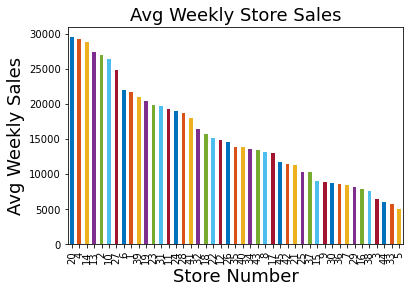

In [115]:
store_sales = merged.groupby('Store')['Weekly_Sales'].mean().reset_index().sort_values(by="Weekly_Sales",ascending=False)

plt.figure(figsize = (35,20))
store_sales.plot.bar(x = 'Store', y = 'Weekly_Sales', legend = None, color = colors)

plt.title("Avg Weekly Store Sales", fontsize=18)
plt.xlabel("Store Number", fontsize=18)
plt.ylabel("Avg Weekly Sales", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=10)

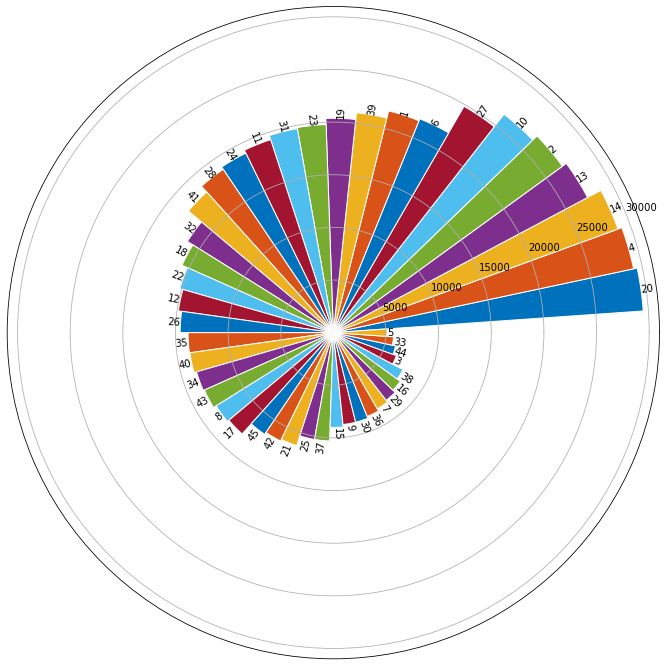

In [116]:
plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.axis()

#set min and max value
lowerLimit = 0
max_v = store_sales['Weekly_Sales'].max()

#set heights and width
heights = store_sales['Weekly_Sales']
width = 2*np.pi / len(store_sales.index)

#set index and angle
indexes = list(range(1, len(store_sales.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color = colors)
labelPadding = 15

for bar, angle, height, label in zip(bars,angles, heights, store_sales['Store']):
    rotation = np.rad2deg(angle)
    alignment = ""
    #deal with alignment
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation, 
            rotation_mode="anchor")
    ax.set_thetagrids([], labels=[])
plt.show()

In [117]:
high_sales = stores.loc[stores['Store'].isin([20, 4, 14, 23, 2, 10, 27, 6, 1, 39, 19, 23, 31, 11, 24, 28, 41, 32, 18, 22, 12, 26, 35, 40, 34])]
print(high_sales)

    Store Type    Size                                 DMA 
1      11    A  207499                          Los Angeles
2      28    A  206302                      Dallas-Ft.Worth
3       4    A  205863                              Houston
4      27    A  204184                              Houston
5      19    A  203819                         Philadelphia
6      24    A  203819                              Atlanta
7      31    A  203750                              Atlanta
8      20    A  203742                       Tampa-St. Pete
9      32    A  203007                               Denver
10      6    A  202505  Oralando-Daytona Brach-Melbourne FL
11      2    A  202307                      Cleveland-Akron
12     14    A  200898                      Dallas-Ft.Worth
13     41    A  196321                          Los Angeles
14     39    A  184109                              Chicago
15     34    A  158114                      Cleveland-Akron
16     40    A  155083                  

In [118]:
low_sales = stores.loc[stores['Store'].isin([5, 33, 44, 3, 38, 16, 29, 7, 36, 30])]
low_sales

,Store,Type,Size,DMA
31,29,B,93638,Chicago
33,7,B,70713,Cleveland-Akron
34,16,B,57197,Dallas-Ft.Worth
35,30,C,42988,Los Angeles
37,36,A,39910,Salt Lake City
39,44,C,39910,Atlanta
40,33,A,39690,Atlanta
41,38,C,39690,Kansas City
43,3,B,37392,Denver
44,5,B,34875,Austin


<Figure size 2520x1440 with 0 Axes>

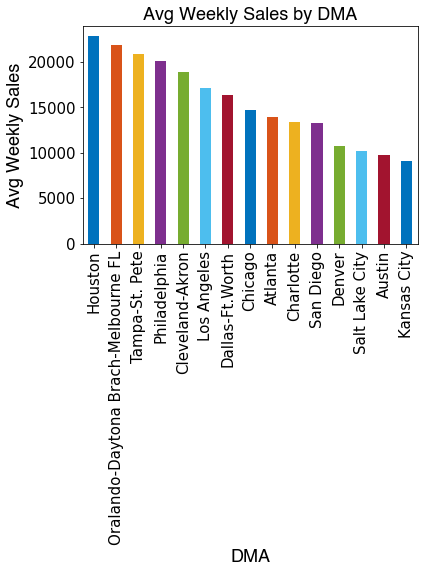

In [119]:
dma_sales = merged.groupby('DMA')['Weekly_Sales'].mean().reset_index().sort_values(by="Weekly_Sales",ascending=False)
dma_sales

hfont = {'fontname':'Helvetica'}

plt.figure(figsize = (35,20))
dma_sales.plot.bar(x = 'DMA', y = 'Weekly_Sales', legend = None, color = colors)

plt.title("Avg Weekly Sales by DMA", fontsize=18, **hfont)
plt.xlabel("DMA", fontsize=18, **hfont)
plt.ylabel("Avg Weekly Sales", fontsize=18, **hfont)
plt.tick_params(axis='both', which='major', labelsize=15)

In [171]:
demographic = pd.read_csv("/Users/katierodeghiero/Documents/CPSC_Courses/MGSC410/Demographic_Data.csv", thousands=',')
demographic.shape

demographic['Population'] = demographic['Population'].astype(float)

demographic['Med_Income'] = demographic['Med_Income'].replace(regex=[r'\D+'], value="").astype(float)
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                210 non-null    int64  
 1   DMA_Name          210 non-null    object 
 2   Area              210 non-null    float64
 3   Latitude          210 non-null    float64
 4   Longitude         210 non-null    float64
 5   Country           210 non-null    object 
 6   Population        210 non-null    float64
 7   Household_count   210 non-null    int64  
 8   Med_Income        210 non-null    float64
 9   No_Vehicles       210 non-null    int64  
 10  Public_Transport  210 non-null    int64  
 11  Bus               210 non-null    int64  
 12  Mass_Transit      210 non-null    int64  
 13  Taxi              210 non-null    int64  
 14  Other_PubTrans    210 non-null    int64  
 15  White             210 non-null    int64  
 16  African_American  210 non-null    int64  
 1

In [121]:
import circlify
import plotly.express as px

demographic = demographic.sort_values(by='Population', ascending=False)

# compute circle positions:
circles = circlify.circlify(demographic['Population'].tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
circles.reverse()

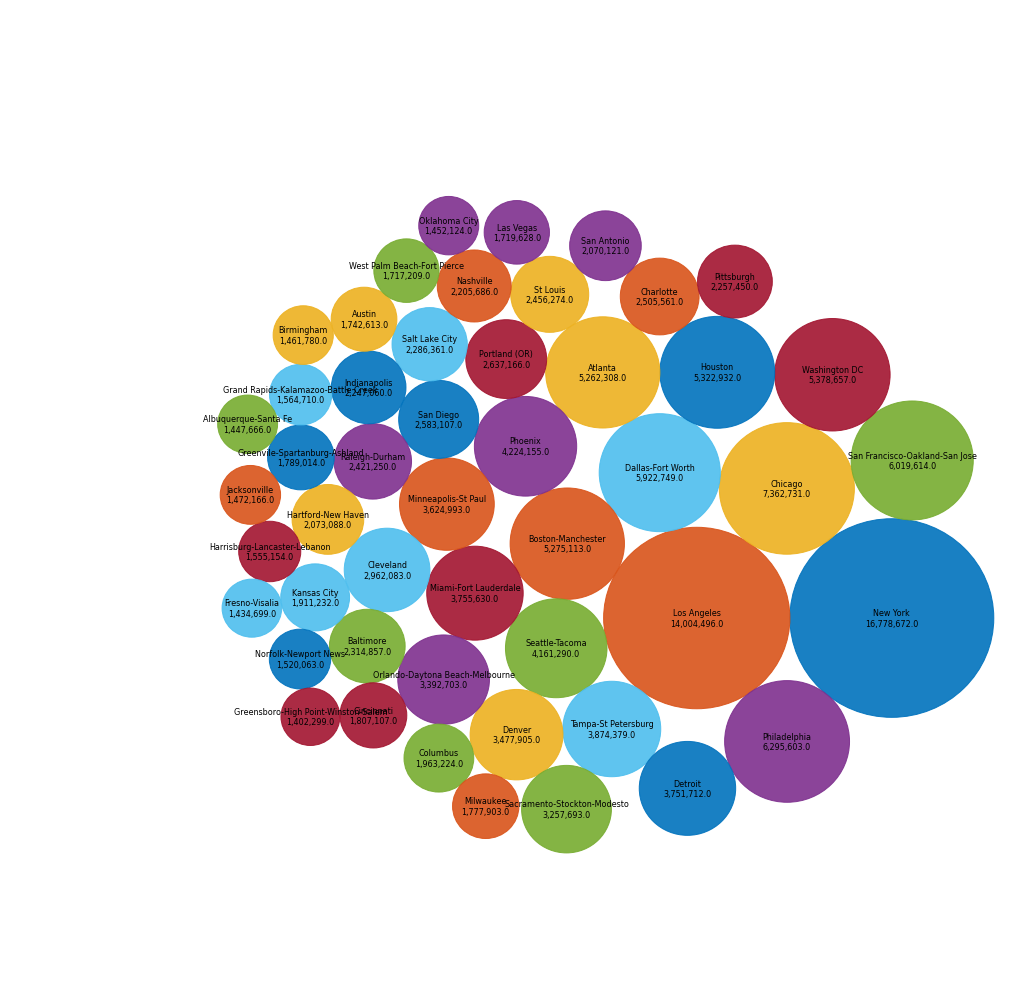

In [122]:
fig, ax = plt.subplots(figsize=(18, 18), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle, label, emi, color in zip(circles, demographic['DMA_Name'], demographic['Population'], colors):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color))
    plt.annotate(label +'\n'+ format(emi, ","), (x,y), size=8, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

In [123]:
demographic = demographic.sort_values(by='Med_Income', ascending=False)

# compute circle positions:
circles = circlify.circlify(demographic['Med_Income'].tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
circles.reverse()

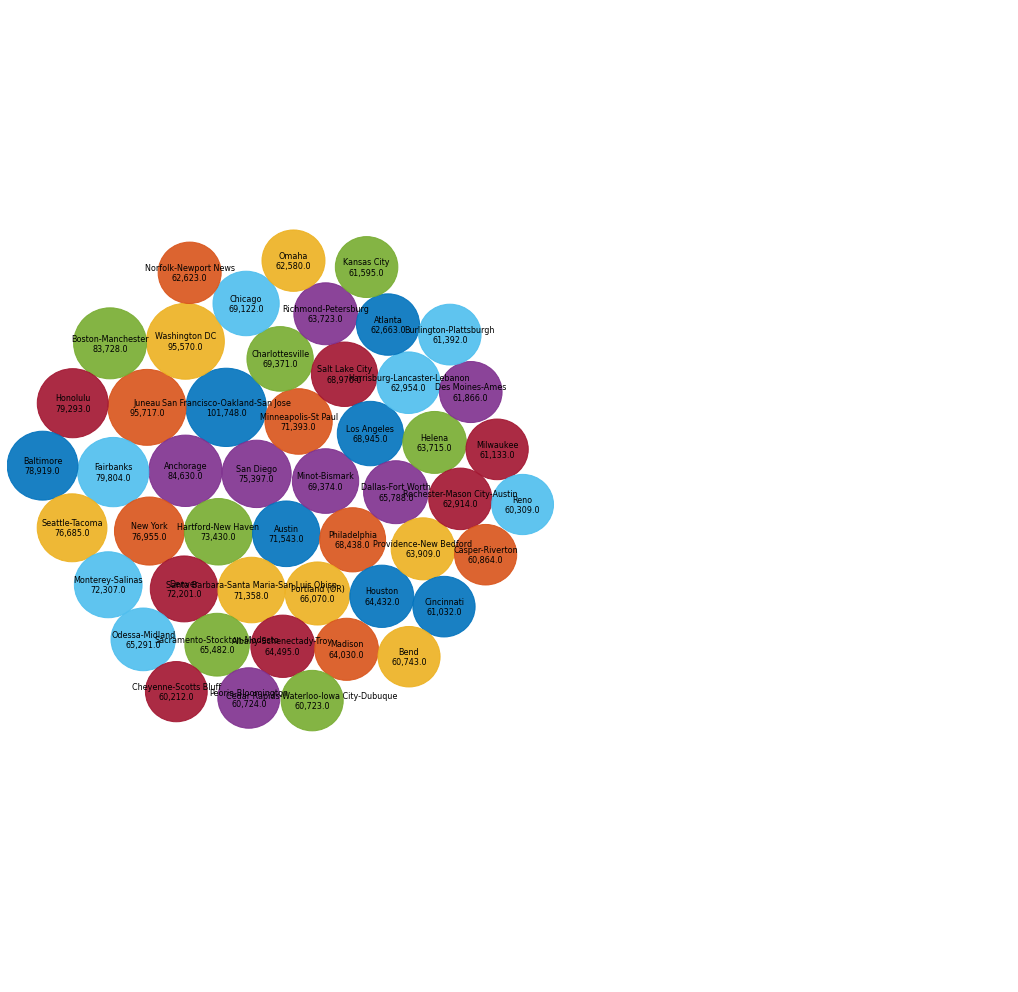

In [124]:
fig, ax = plt.subplots(figsize=(18, 18), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle, label, emi, color in zip(circles, demographic['DMA_Name'], demographic['Med_Income'], colors):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color))
    plt.annotate(label +'\n'+ format(emi, ","), (x,y), size=8, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

In [172]:
hold = demographic["Med_Income"] > 65000

demographic = demographic.loc[hold]


<Figure size 21600x7200 with 0 Axes>

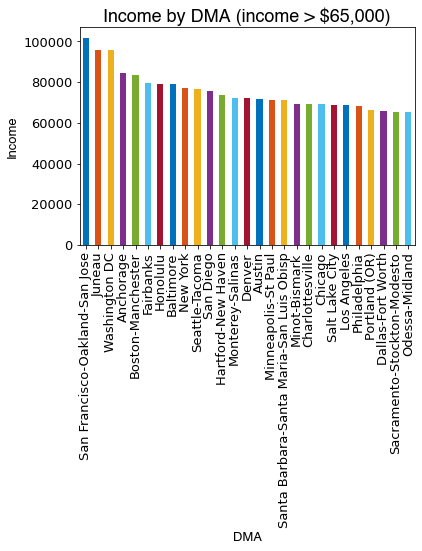

In [173]:
demographic = demographic.sort_values(by='Med_Income', ascending=False)

plt.figure(figsize = (300, 100))
demographic.plot.bar(x = 'DMA_Name', y = 'Med_Income', legend = None, color = colors)

plt.title("Income by DMA (income > $65,000)", fontsize=18, **hfont)
plt.xlabel("DMA", fontsize=13, **hfont)
plt.ylabel("Income", fontsize=13, **hfont)
plt.tick_params(axis='both', which='major', labelsize=13)

<Figure size 21600x7200 with 0 Axes>

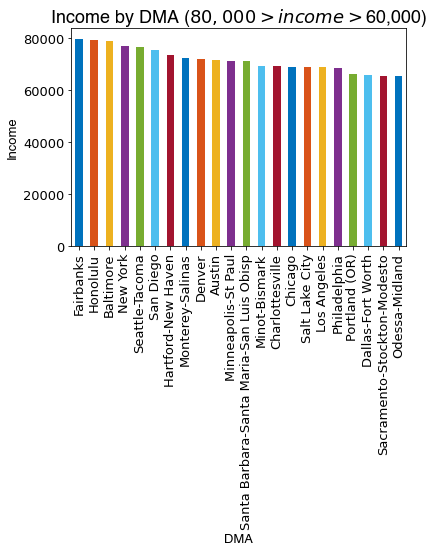

In [174]:
hold = ((demographic["Med_Income"] > 60000) & (demographic["Med_Income"] < 80000))

demographic = demographic.loc[hold]

demographic = demographic.sort_values(by='Med_Income', ascending=False)

plt.figure(figsize = (300, 100))
demographic.plot.bar(x = 'DMA_Name', y = 'Med_Income', legend = None, color = colors)

plt.title("Income by DMA ($80,000 > income > $60,000)", fontsize=18, **hfont)
plt.xlabel("DMA", fontsize=13, **hfont)
plt.ylabel("Income", fontsize=13, **hfont)
plt.tick_params(axis='both', which='major', labelsize=13)

In [131]:
print(demographic.shape)
DMA_list = demographic['DMA_Name'].tolist()
  
print(DMA_list)

(45, 23)
['Fairbanks', 'Honolulu', 'Baltimore', 'New York', 'Seattle-Tacoma', 'San Diego', 'Hartford-New Haven', 'Monterey-Salinas', 'Denver', 'Austin', 'Minneapolis-St Paul', 'Santa Barbara-Santa Maria-San Luis Obisp', 'Minot-Bismark', 'Charlottesville', 'Chicago', 'Salt Lake City', 'Los Angeles', 'Philadelphia', 'Portland (OR)', 'Dallas-Fort Worth', 'Sacramento-Stockton-Modesto', 'Odessa-Midland', 'Albany-Schenectady-Troy', 'Houston', 'Madison', 'Providence-New Bedford', 'Richmond-Petersburg', 'Helena', 'Harrisburg-Lancaster-Lebanon', 'Rochester-Mason City-Austin', 'Atlanta', 'Norfolk-Newport News', 'Omaha', 'Des Moines-Ames', 'Kansas City', 'Burlington-Plattsburgh', 'Milwaukee', 'Cincinnati', 'Casper-Riverton', 'Bend', 'Peoria-Bloomington', 'Cedar Rapids-Waterloo-Iowa City-Dubuque', 'Reno', 'Cheyenne-Scotts Bluff', 'St Louis']


In [137]:
demographic = pd.read_csv("/Users/katierodeghiero/Documents/CPSC_Courses/MGSC410/Demographic_Data.csv", thousands=',')

new_df = pd.DataFrame()

for index,row in demographic.iterrows():
    for j in DMA_list:
        if row['DMA_Name'] == j:
            new_df = new_df.append(row)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 206
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   African_American  45 non-null     float64
 1   American_Indian   45 non-null     float64
 2   Area              45 non-null     float64
 3   Asian             45 non-null     float64
 4   Bus               45 non-null     float64
 5   Country           45 non-null     object 
 6   DMA_Name          45 non-null     object 
 7   Hawaiian          45 non-null     float64
 8   Hispanic          45 non-null     float64
 9   Household_count   45 non-null     float64
 10  ID                45 non-null     float64
 11  Latitude          45 non-null     float64
 12  Longitude         45 non-null     float64
 13  Mass_Transit      45 non-null     float64
 14  Med_Income        45 non-null     object 
 15  Muti_Race         45 non-null     float64
 16  No_Vehicles       45 non-null     float64
 17

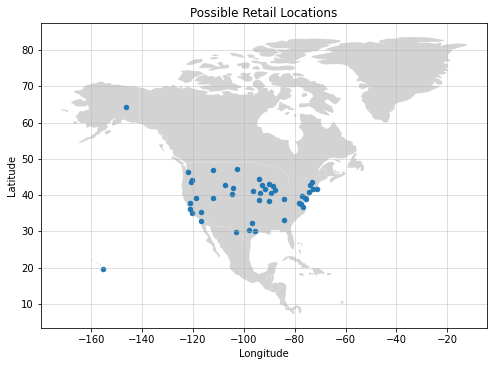

In [169]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries.continent == 'North America'].plot(color="lightgrey",
                                                 ax=ax)
# plot points
new_df.plot(x="Longitude", y="Latitude", kind="scatter",  
        title="Possible Retail Locations", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()